In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Let's first read our preprocessed data

In [2]:
df = pd.read_csv('data_preprocessed.csv')

## Choose the correct metrics

Our data is highly skewed as can be seen below. We have roughly **89%** of non-churners and **11%** of churners. For such classification problem accuracy is not a good metric because just a simple random guess will have a 89% chance to be a non-churner. Therefor we have to look at the different metrics here. A good choice can be a **recall** value for the churn class as it will tell us about the ratio of positive (churn) instances that are correctly detected by the classifier. That is the main goal cause if we predict non-churners as churners it won't be a big problem. This will only mean that the company will also take care of some customers who are actually not going to churn. The most important point is to identify as many churners as possible. There is obviously a trade-off between the recall and **precision** (accuracy of positive predictions) but here we should focus at the relatively high recall.

The other related metrics to compare our models can be a **ROC curve** which plots a true positive rate (recall) versus a false positive rate (ratio of negative instances incorrectly classified as positive). This is exactly what are we looking for - the trade off between correctly classified churners and incorrectly classified non-churners. As a score with ROC curve we use a AUC score which is the area under curve. For the perfect classifier it is equal to 1 and for purely random to 0.5.

0    89.13
1    10.87
Name: churn_flag, dtype: float64

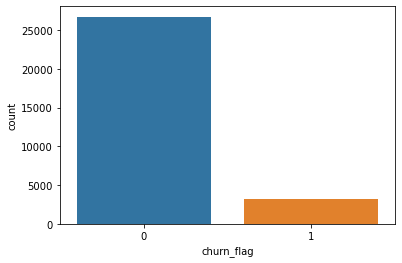

In [3]:
sns.countplot(data=df, x='churn_flag')
round(df['churn_flag'].value_counts() * 100 / len(df), 2)

## Train on the non-sampled data

Let's first try a bunch of simple non-tuned models to see what we can achieve with the current data. 
We have to split our data for features and targets and also standardize our features as they have very different range of values and it will hurt performance if we leave them as they are. Then we also split our data for train and test parts with ratio of 80/20.

It is also worth to notice that we should not use **fit_transform** on both train and test sets and not scale our data before splitting. Fitting of the transformer should be done only on the training data so that during training there is no information taken from the test data. Otherwise standardization, so calculation of mean values and standard deviations is done also on the test set and it affects the training data.

In [4]:
X = df.drop(['churn_flag', 'Unnamed: 0'], axis=1)
y= df['churn_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
clf = {'lr': LogisticRegression(),
      'rf': RandomForestClassifier(n_jobs=-1),
      'svm': SVC(),
      'xgb': XGBClassifier(n_jobs=-1),
      'knn': KNeighborsClassifier(n_jobs=-1),
      'nb': GaussianNB()}

fit_model_base = {}

for name, algo in clf.items():
    model = algo.fit(X_train, y_train)
    fit_model_base[name] = model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Evaluate our simple models

Having trained our models we can now display the classification report, plot the confusion matrix and the ROC curve for all of them to compare

lr
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5318
           1       0.70      0.41      0.52       673

    accuracy                           0.91      5991
   macro avg       0.81      0.70      0.74      5991
weighted avg       0.90      0.91      0.90      5991



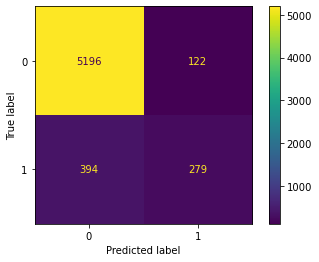

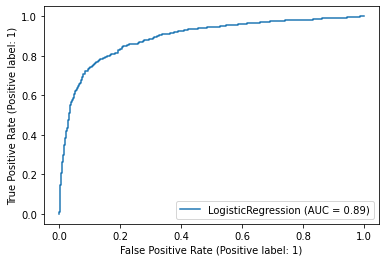

rf
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5318
           1       0.76      0.47      0.58       673

    accuracy                           0.92      5991
   macro avg       0.85      0.72      0.77      5991
weighted avg       0.92      0.92      0.92      5991



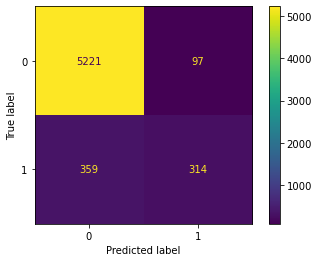

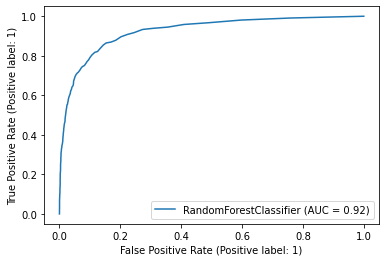

svm
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5318
           1       0.73      0.42      0.53       673

    accuracy                           0.92      5991
   macro avg       0.83      0.70      0.74      5991
weighted avg       0.91      0.92      0.91      5991



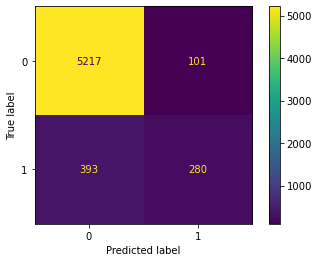

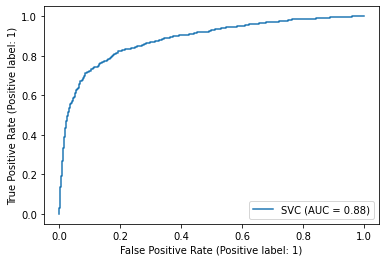

xgb
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5318
           1       0.72      0.52      0.60       673

    accuracy                           0.92      5991
   macro avg       0.83      0.75      0.78      5991
weighted avg       0.92      0.92      0.92      5991



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


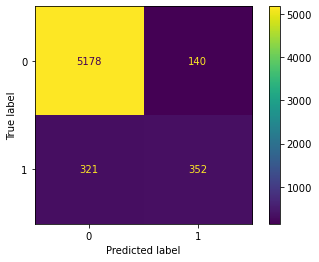

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


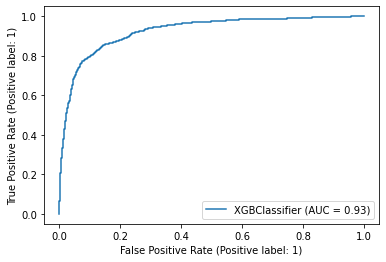

knn
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5318
           1       0.51      0.49      0.50       673

    accuracy                           0.89      5991
   macro avg       0.72      0.71      0.72      5991
weighted avg       0.89      0.89      0.89      5991



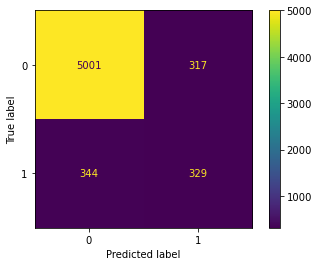

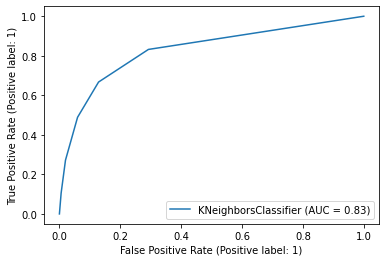

nb
              precision    recall  f1-score   support

           0       0.97      0.73      0.83      5318
           1       0.27      0.80      0.41       673

    accuracy                           0.74      5991
   macro avg       0.62      0.77      0.62      5991
weighted avg       0.89      0.74      0.79      5991



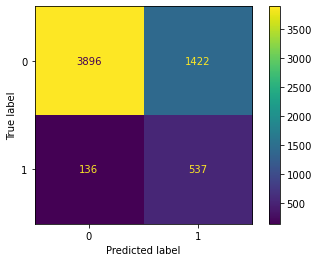

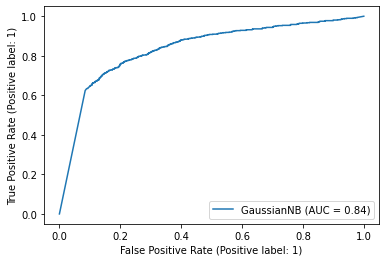

In [6]:
for name, model in fit_model_base.items():
    print(name)
    print(classification_report(y_test, model.predict(X_test)))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    plot_roc_curve(model, X_test, y_test)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


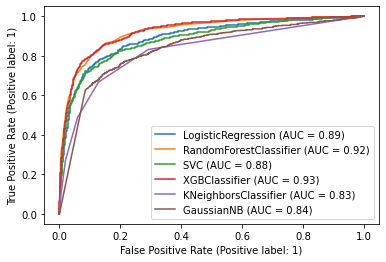

In [7]:
fig, ax = plt.subplots()
for name, model in fit_model_base.items():
    plot_roc_curve(model, X_test, y_test, ax=ax)

In [8]:
for name, model in fit_model_base.items():
    pickle.dump(model, open(name + '.pkl', 'wb'))

As we could see above, most of ours models have the same problem of detecing less than half of the churners correctly which is really bad. Only XGB classifier predicted more than a half correctly but still it is not what we are looking for. It looks like all of the models are focused on predicting correctly the non-churners. This is mainly because we have a highly imbalanced classes. There are certain ways of reducing this problem and we can look at the in the next section.

## Resample using SMOTE

There are couple of methods for resampling our data. One is to udersample the majority class to the size of the minority class but this reduces the size of the data significantly. The other method is to oversample the minority class to the size of the majority class by randomly replicating values. It is usually a source of overfitting. Much better method is to use a technique called **SMOTE** - Synthetic Minority Oversampling Technique. Here the subset of the data is taken from the minority class and new synthetic instances are created. Then they are added to the original dataset. We gonna use the modified **SMOTEENN** method which combines both oversampling and undersampling. The produced dataset is not equally balanced as we will see but much better distributed than the raw version and we will have more positive than negative instances.

In [9]:
X = df.drop(['churn_flag', 'Unnamed: 0'], axis=1)
y= df['churn_flag']

from imblearn.combine import SMOTEENN 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

scaler = StandardScaler()
sm = SMOTEENN(random_state=120, n_jobs=-1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_res_sm, y_train_res_sm = sm.fit_resample(X_train, y_train)

In [10]:
round(y_train_res_sm.value_counts() * 100 / len(y_train_res_sm), 2)

1    62.48
0    37.52
Name: churn_flag, dtype: float64

In [11]:
clf = {'lr_sm': LogisticRegression(),
      'rf_sm': RandomForestClassifier(n_jobs=-1),
      'svm_sm': SVC(),
      'xgb_sm': XGBClassifier(n_jobs=-1),
      'knn_sm': KNeighborsClassifier(n_jobs=-1),
      'nb_sm': GaussianNB()}

fit_model_sm = {}

for name, algo in clf.items():
    model = algo.fit(X_train_res_sm, y_train_res_sm)
    fit_model_sm[name] = model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


lr_sm
              precision    recall  f1-score   support

           0       0.98      0.73      0.83      5318
           1       0.29      0.88      0.44       673

    accuracy                           0.74      5991
   macro avg       0.63      0.80      0.64      5991
weighted avg       0.90      0.74      0.79      5991



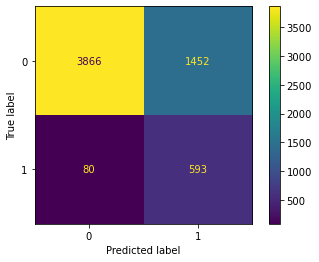

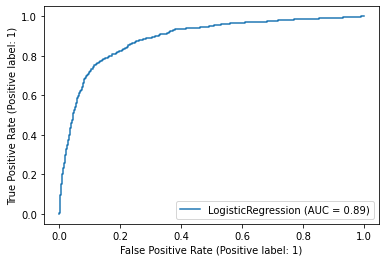

rf_sm
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5318
           1       0.44      0.81      0.57       673

    accuracy                           0.86      5991
   macro avg       0.71      0.84      0.75      5991
weighted avg       0.91      0.86      0.88      5991



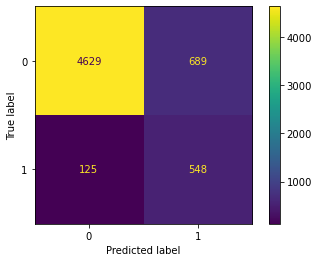

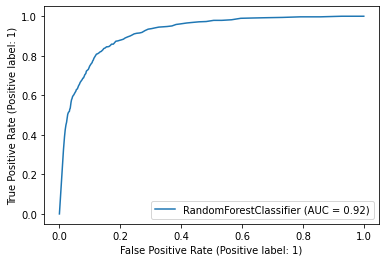

svm_sm
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5318
           1       0.35      0.81      0.49       673

    accuracy                           0.81      5991
   macro avg       0.66      0.81      0.69      5991
weighted avg       0.90      0.81      0.84      5991



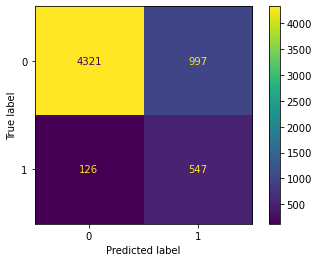

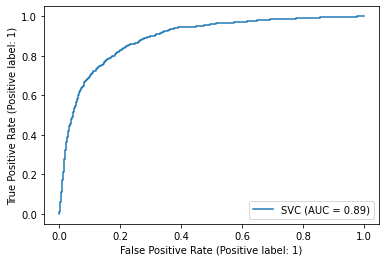

xgb_sm
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      5318
           1       0.47      0.82      0.59       673

    accuracy                           0.87      5991
   macro avg       0.72      0.85      0.76      5991
weighted avg       0.92      0.87      0.89      5991



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


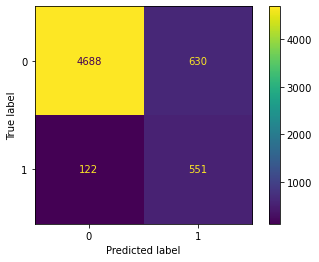

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


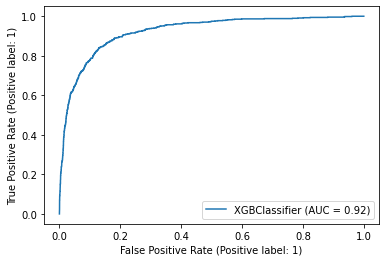

knn_sm
              precision    recall  f1-score   support

           0       0.98      0.56      0.72      5318
           1       0.21      0.90      0.34       673

    accuracy                           0.60      5991
   macro avg       0.59      0.73      0.53      5991
weighted avg       0.89      0.60      0.67      5991



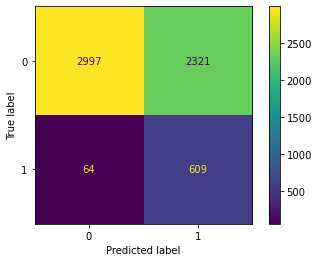

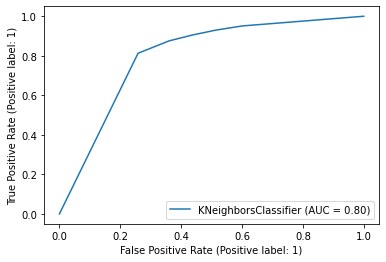

nb_sm
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      5318
           1       0.25      0.80      0.38       673

    accuracy                           0.71      5991
   macro avg       0.61      0.75      0.60      5991
weighted avg       0.89      0.71      0.76      5991



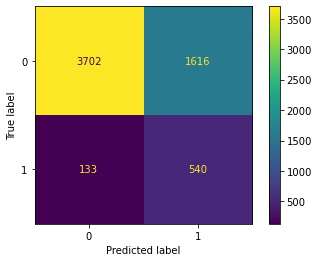

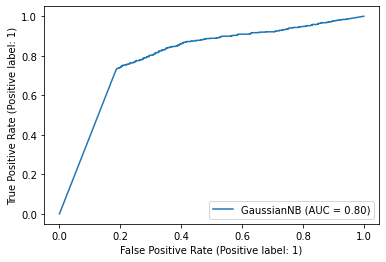

In [12]:
for name, model in fit_model_sm.items():
    print(name)
    print(classification_report(y_test, model.predict(X_test)))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    plot_roc_curve(model, X_test, y_test)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


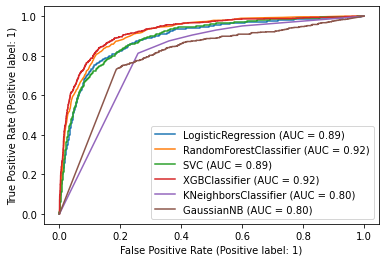

In [13]:
fig, ax = plt.subplots()
for name, model in fit_model_sm.items():
    plot_roc_curve(model, X_test, y_test, ax=ax)

In [14]:
for name, model in fit_model_sm.items():
    pickle.dump(model, open(name + '.pkl', 'wb'))

As we could see above, now we get much better predictions for churn class. More than 80% of recall is a really good score. Obviosuly we suffer also from the low precision and classify some part of the non-churners as churners but as mentioned before, we should focus mostly on the correct predictions for churners. Random Forest and XGB classifiers are doing the best from the tested models so we can tune them and see if better hyperparamters will improve their performance. 

For such a big dataset hyperparameter tuning is a very lengthy process and require large computational effort. Therefore I have only tested Random Forest with hyperopt library which can automatically search in a very large space of parameters for the best ones for a specific model. I did this using Colab and saved the best model. 

In [15]:
rf_tuned = pickle.load(open('models/rf_tuned.pkl', 'rb'))
rf_tuned

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


RandomForestClassifier(criterion='entropy', max_features=0.24430845257323486,
                       n_estimators=141, n_jobs=1, random_state=0,
                       verbose=False)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5318
           1       0.44      0.82      0.58       673

    accuracy                           0.86      5991
   macro avg       0.71      0.85      0.75      5991
weighted avg       0.91      0.86      0.88      5991



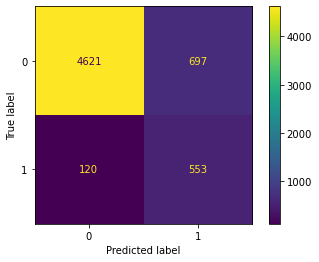

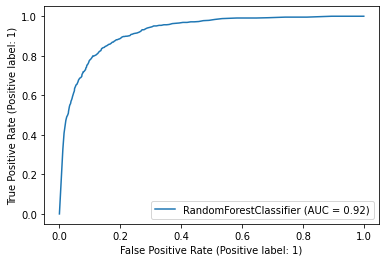

In [16]:
print(classification_report(y_test, rf_tuned.predict(X_test)))
plot_confusion_matrix(rf_tuned, X_test, y_test)
plot_roc_curve(rf_tuned, X_test, y_test)

Unfortunately we don't get better results. I have only searched for 20 iterations so it was probably not enough.
We can spend more time on hyperparameters tuning but our model is already really good so lets keep it.

## Feature Importances

XGB and Random Forest provide also scores for every feature to measure how important they are for training. Let's look at the top 30 features predicted by both models.

In [17]:
importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fit_model_sm['xgb_sm'].feature_importances_
})
importances_xgb = importances_xgb.sort_values(by='Importance', ascending=False)
importances_xgb = importances_xgb.set_index('Feature')

importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fit_model_sm['rf_sm'].feature_importances_
})
importances_rf = importances_rf.sort_values(by='Importance', ascending=False)
importances_rf = importances_rf.set_index('Feature')

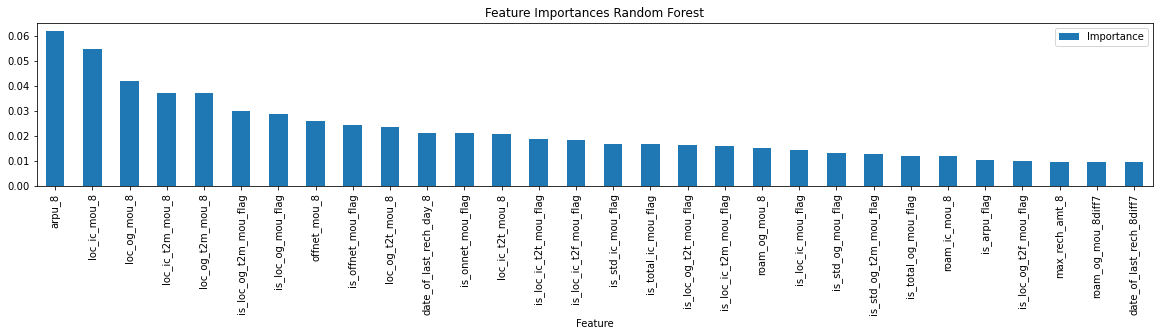

<AxesSubplot:title={'center':'Feature Importances XGB Classifier'}, xlabel='Feature'>

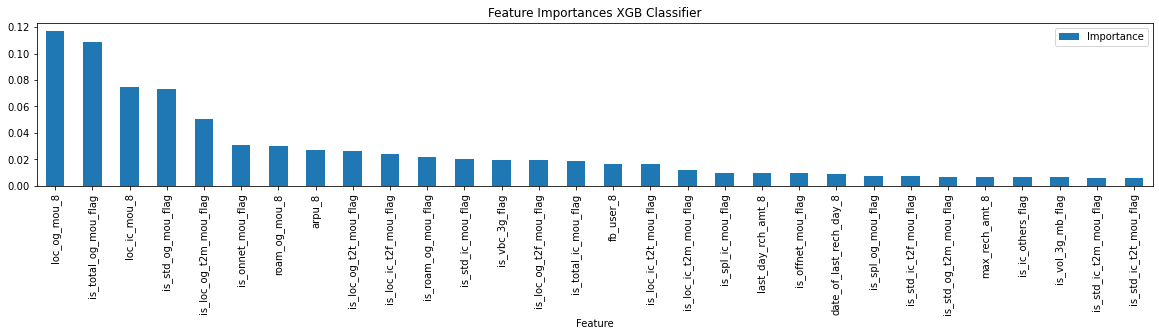

In [18]:
importances_rf[:30].plot(kind='bar', figsize=(20,3), title='Feature Importances Random Forest')
plt.show()
importances_xgb[:30].plot(kind='bar', figsize=(20,3), title='Feature Importances XGB Classifier')

The top 30 features predicted by both models are the same but their relative importance is different as we could see above. These features should be then monitored by the company as they are good indicators of whether the customer will churn or not. 

Without further tuning we can choose either XGB or Random Forest as the final model cause they give very similar results in terms of AUC score and recall value for churn class.